In [ ]:
#拟合一个圆，区分圆内外的点，显示。

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 30
seed = 2
rdm = np.random.RandomState(seed)
X = rdm.randn(300,2)#300个数据，每个数据包含横纵坐标。
Y = [int(x0**2 + x1**2 < 2) for (x0,x1) in X]#Y：是否距离原点2以内
Y_c = [['red' if y else 'blue'] for y in Y]#赋值颜色

In [3]:
print(X.shape)
print(type(X))
print(len(Y))
print(type(Y))#类型不一样。
X = np.vstack(X).reshape(-1,2)
Y = np.vstack(Y).reshape(-1,1)#主要是处理一下Y
print(X.shape)
print(Y.shape)
print(len(Y_c))

(300, 2)
<class 'numpy.ndarray'>
300
<class 'list'>
(300, 2)
(300, 1)
300


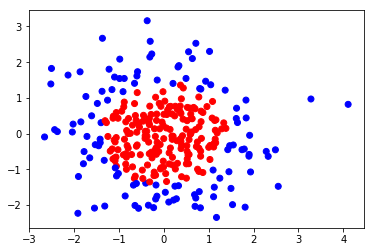

In [4]:
plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c))#从Y_c取颜色参数。

plt.show()

In [9]:
def get_weight(shape, scale):
    w = tf.Variable(tf.random_normal(shape), dtype = tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(scale)(w))
    return w
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b
x = tf.placeholder(tf.float32, shape = (None,2))
y = tf.placeholder(tf.float32, shape = (None,1))

w1 = get_weight([2,11],0.01)
b1 = get_bias([11])
l1 = tf.nn.relu(tf.matmul(x,w1,name='matmul1')+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
print(l1)
print(w2)
y_pred = tf.matmul(l1,w2,name='matmul2') + b2

loss_mse = tf.reduce_mean(tf.square(y-y_pred))
print(tf.get_collection('losses'))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))



Tensor("Relu_3:0", shape=(?, 11), dtype=float32)
<tf.Variable 'Variable_14:0' shape=(11, 1) dtype=float32_ref>
[<tf.Tensor 'l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_1:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_2:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_3:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_4:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_5:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_6:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_7:0' shape=() dtype=float32>]


after 0 steps, mse loss is 4.275043
after 2000 steps, mse loss is 0.850262
after 4000 steps, mse loss is 0.372194
after 6000 steps, mse loss is 0.203557
after 8000 steps, mse loss is 0.150079
after 10000 steps, mse loss is 0.122145
after 12000 steps, mse loss is 0.099617
after 14000 steps, mse loss is 0.085322
after 16000 steps, mse loss is 0.078442
after 18000 steps, mse loss is 0.074793
after 20000 steps, mse loss is 0.072115
after 22000 steps, mse loss is 0.070250
after 24000 steps, mse loss is 0.069109
after 26000 steps, mse loss is 0.068249
after 28000 steps, mse loss is 0.067528
after 30000 steps, mse loss is 0.067107
after 32000 steps, mse loss is 0.066846
after 34000 steps, mse loss is 0.066646
after 36000 steps, mse loss is 0.066511
after 38000 steps, mse loss is 0.066410
w1: [[ 0.42870259 -1.32321727 -0.50509775 -1.32402921  0.92775673  0.30390763
  -0.40421596 -0.60656923  0.14833862 -1.16129613 -0.06999239]
 [-1.19079292  0.4505724  -0.25327247  0.44175559  0.29444328 -0.94

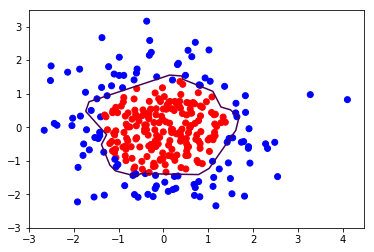

In [19]:
train_op = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    STEPS = 40000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 300
        end = start + BATCH_SIZE
#         print('start:',start)
#         print('end:',end)
#         print(X.shape)
#         print(Y.shape)
        sess.run(train_op, feed_dict={x:X[start:end],y:Y[start:end]})
        if i % 2000 == 0:
            loss_mse_v = sess.run(loss_mse, feed_dict = {x:X,y:Y})
            print('after %d steps, mse loss is %f'%(i,loss_mse_v))
    #从-3到3生成网格
    xx,yy = np.mgrid[-3:3:.01, -3:3:.01]
    #这是网格坐标点集合
    grid = np.c_[xx.ravel(),yy.ravel()]
    #给网格做一个输出
    probs = sess.run(y_pred, feed_dict = {x:grid})
    probs = probs.reshape(xx.shape)#todo:为什么要条这个呢shape
    print('w1:',sess.run(w1))
    print('b1:',sess.run(b1))
    print('w2:',sess.run(w2))
    print('b2:',sess.run(b2))
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
    plt.contour(xx, yy, probs, levels=[.5])#他说把probs是0.5的上色，我看这个应该是画分界线。contour本意是轮廓
    #这里不是标签，是预测，所以应该有零有整的，所以有0.5这样的存在（具体取小数点几位？肯定是约等于的吧）
    plt.show()
    

after 0 steps,  loss is 28.803352
after 2000 steps,  loss is 8.065138
after 4000 steps,  loss is 2.869989
after 6000 steps,  loss is 1.285548
after 8000 steps,  loss is 0.593505
after 10000 steps,  loss is 0.412882
after 12000 steps,  loss is 0.351573
after 14000 steps,  loss is 0.305693
after 16000 steps,  loss is 0.269162
after 18000 steps,  loss is 0.240661
after 20000 steps,  loss is 0.218922
after 22000 steps,  loss is 0.202168
after 24000 steps,  loss is 0.189633
after 26000 steps,  loss is 0.179872
after 28000 steps,  loss is 0.172040
after 30000 steps,  loss is 0.165439
after 32000 steps,  loss is 0.160424
after 34000 steps,  loss is 0.156125
after 36000 steps,  loss is 0.152180
after 38000 steps,  loss is 0.148462
w1: [[-0.46815753  0.99910253 -0.04989538 -0.61396164 -0.02884883 -0.43204334
  -0.82417029  1.47838724  0.07742262 -0.49687594  0.07155401]
 [ 0.30541614 -0.62563276  0.59742236  0.23814881  0.73370272  0.69481802
   0.42336872 -0.84828019 -0.24014869 -0.65149039  0

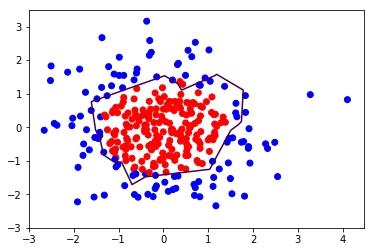

In [18]:
#正则化的结果
train_op2 = tf.train.AdamOptimizer(0.0001).minimize(loss_total)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    STEPS = 40000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_op2, feed_dict={x:X[start:end],y:Y[start:end]})
        if i % 2000 == 0:
            loss_total_v = sess.run(loss_total, feed_dict = {x:X,y:Y})
            print('after %d steps,  loss is %f'%(i,loss_total_v))
    #从-3到3生成网格
    xx,yy = np.mgrid[-3:3:.01, -3:3:.01]
    #这是网格坐标点集合
    grid = np.c_[xx.ravel(),yy.ravel()]
    #给网格做一个输出
    probs = sess.run(y_pred, feed_dict = {x:grid})
    probs = probs.reshape(xx.shape)#todo:为什么要条这个呢shape
    print('w1:',sess.run(w1))
    print('b1:',sess.run(b1))
    print('w2:',sess.run(w2))
    print('b2:',sess.run(b2))
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
    plt.contour(xx, yy, probs, levels=[.5])
    plt.show()

In [6]:
help(tf.contrib.layers.l2_regularizer)

Help on function l2_regularizer in module tensorflow.contrib.layers.python.layers.regularizers:

l2_regularizer(scale, scope=None)
    Returns a function that can be used to apply L2 regularization to weights.
    
    Small values of L2 can help prevent overfitting the training data.
    
    Args:
      scale: A scalar multiplier `Tensor`. 0.0 disables the regularizer.
      scope: An optional scope name.
    
    Returns:
      A function with signature `l2(weights)` that applies L2 regularization.
    
    Raises:
      ValueError: If scale is negative or if scale is not a float.



In [49]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour li

In [8]:
#tf.add_n测试，总之，就是把多个Tensor聚集起来，等于强行画计算图依赖关系，参与计算。

arr_a = np.array([[1,2],[3,4]])
arr_b = np.array([[10,11],[12,13]])
print(arr_a)
print(arr_a.shape)
print(arr_b)
with tf.name_scope(name = 'input'):
    a = tf.placeholder(shape = (None,2), dtype = tf.float32)
    b = tf.placeholder(shape = (None,2), dtype = tf.float32)

#total = tf.add_n(a,b)#错误写法
# total = tf.add_n([a,b])#正确写法1

#正确写法2，不过最好重启内核，GLOBAL比较乱。
#total = tf.add_n(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

#正确写法3，不过最好重启内核，GLOBAL比较乱。
# total = tf.add_n(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))


#正确写法4
tf.add_to_collection('input_test', [a,b])
total = tf.add_n(tf.get_collection('input_test'))

#写法5:从scope获取变量。
# total = tf.add_n(tf.get_collection(tf.get_variable_scope()))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print('total:',sess.run(total, feed_dict={a:arr_a, b:arr_b}))
    print('a:',sess.run(a, feed_dict={a:arr_a, b:arr_b}))
    print(sess.run(b, feed_dict={a:arr_a, b:arr_b}))
    

[[1 2]
 [3 4]]
(2, 2)
[[10 11]
 [12 13]]


InvalidArgumentError: Shape [-1,2] has negative dimensions
	 [[Node: input/Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'input/Placeholder', defined at:
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-c728a11e9642>", line 7, in <module>
    a = tf.placeholder(shape = (None,2), dtype = tf.float32)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/qw/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,2] has negative dimensions
	 [[Node: input/Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [27]:
help(tf.get_collection)

Help on function get_collection in module tensorflow.python.framework.ops:

get_collection(key, scope=None)
    Wrapper for `Graph.get_collection()` using the default graph.
    
    See @{tf.Graph.get_collection}
    for more details.
    
    Args:
      key: The key for the collection. For example, the `GraphKeys` class
        contains many standard names for collections.
      scope: (Optional.) If supplied, the resulting list is filtered to include
        only items whose `name` attribute matches using `re.match`. Items
        without a `name` attribute are never returned if a scope is supplied and
        the choice or `re.match` means that a `scope` without special tokens
        filters by prefix.
    
    Returns:
      The list of values in the collection with the given `name`, or
      an empty list if no value has been added to that collection. The
      list contains the values in the order under which they were
      collected.



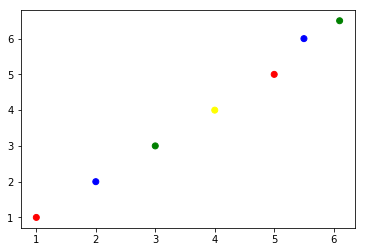

In [39]:
#squeeze测试
c = np.squeeze(Y_c)
# print(c)

#plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c)[0:10])#颜色数量不够匹配数据，也不报错，但是打印出来就不太一样了
#plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c)[0:1000])#颜色数量不够匹配数据，也不报错，但是打印出来就不太一样了
#实测，颜色不足的时候，自动交替脑补
X6 = np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[5.5,6],[6.1,6.5]])
plt.scatter(X6[:,0],X6[:,1],c = ['red','blue','green','yellow'])
# plt.scatter(X6[:,0],X6[:,1],c = ['red','yellow'])
plt.show()
